#### This jupyter notebook is used to annotate each state identified from Example1-comparing-clustering-annotation.ipynb using the transcriptional regulation networks.

#### Load libraries

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import rpy2.robjects as ro
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()
import scipy 
import scipy.stats as ss
import statsmodels
import sys
from statsmodels import stats
from statsmodels.stats import multitest
sys.path.append('../Script/')
import FM_States
import FM_selection
import TF
import rpy2
from rpy2.robjects.packages import importr

base = importr('base')
CC = importr('ConsensusClusterPlus')
pheatmap = importr('pheatmap')
bezier = importr('bezier')

ROOT_DIR = os.path.abspath("../")

#### Load parameters

In [3]:
para = {
    'output_dir': ROOT_DIR+"/Sample_output/Example1/",
    'input_expr_file': os.path.join(ROOT_DIR, "Sample_input/Example1/Sample1_data_MCF7_drugs_CTRP2.csv"),
    'sele_modules': ['Translation',
         'Nucleotide metabolism',
         'Signal transduction',
         'Amino acid metabolism',
         'Folding sorting and degradation',
         'Replication and repair',
         'Carbohydrate metabolism',
         'Membrane transport',
         'Cellular community - eukaryotes',
         'Lipid metabolism',
         'Metabolism of other amino acids',
         'Transcription',
         'Xenobiotics biodegradation and metabolism',
         'Signaling molecules and interaction',
         'Energy metabolism',
         'Transport and catabolism',
         'Glycan biosynthesis and metabolism',
         'Metabolism of cofactors and vitamins',
         'Cell motility',
         'Cell cycle', 
         'Apoptosis', 
         'Cellular senescence', 
         'p53 signaling pathway']
}

#### Load all the input files including: selecting the functional modules; import the gene expression profiles; 

In [4]:
dic_module, KEGG_level2, KEGG_level3, KEGG_modules = FM_selection.load_function_modules("KEGG")
module_selected_gmt = KEGG_modules.loc[KEGG_modules['name'].isin(para['sele_modules']) ]
output_dir = para['output_dir']
data_matrix_MCF7_CTRP2 = pd.read_csv(para['input_expr_file'], index_col = 'Unnamed: 0')
Features =pd.read_csv(output_dir+"/Features.csv")
annotation_col_1 = pd.read_csv(output_dir+"/annotation_col.csv", index_col= 'Unnamed: 0')

In [5]:
TF_active = TF.get_tfpairs_for_select_pathways_directed(data_matrix_MCF7_CTRP2,para['sele_modules'],dic_module, active = True)
TF_suppress = TF.get_tfpairs_for_select_pathways_directed(data_matrix_MCF7_CTRP2,para['sele_modules'],dic_module, active = False)

In [6]:
data_matrix_MCF7_CTRP2 = pd.read_csv(os.path.join(ROOT_DIR, "Sample_input/Example1/Sample1_data_MCF7_drugs_CTRP2.csv"))
data_matrix_MCF7_CTRP2 = data_matrix_MCF7_CTRP2.set_index('Unnamed: 0')

In [7]:
TF_path_interaction_active = TF.TF_annotation(Features, TF_active, data_matrix_MCF7_CTRP2, annotation_col_1, output_dir, active = True)
TF_path_interaction_suppression = TF.TF_annotation(Features, TF_suppress, data_matrix_MCF7_CTRP2,annotation_col_1, output_dir, active = False)
TF_path_interaction_active['Action'] = ['Active']*TF_path_interaction_active.shape[0]
TF_path_interaction_suppression['Action'] = ['Supress']*TF_path_interaction_suppression.shape[0]
TF_interaction_all = pd.concat([TF_path_interaction_active,TF_path_interaction_suppression],axis = 0)
TF_interaction_all.to_csv(output_dir + "TF_path_all.csv")

#### The interactions between TF and path can be visulized using cytoscape.

In [13]:
def plot_gene_expr(data_matrix_MCF7_CTRP2, annotation_col_1, Gene):
    from scipy.stats import f_oneway

    x5 = list(data_matrix_MCF7_CTRP2.loc[annotation_col_1.loc[annotation_col_1['States'] == 'S5'].index,[Gene]][Gene].values)
    x4 = list(data_matrix_MCF7_CTRP2.loc[annotation_col_1.loc[annotation_col_1['States'] == 'S4'].index,[Gene]][Gene].values)
    x3 = list(data_matrix_MCF7_CTRP2.loc[annotation_col_1.loc[annotation_col_1['States'] == 'S3'].index,[Gene]][Gene].values)
    x2 = list(data_matrix_MCF7_CTRP2.loc[annotation_col_1.loc[annotation_col_1['States'] == 'S2'].index,[Gene]][Gene].values)
    x1 = list(data_matrix_MCF7_CTRP2.loc[annotation_col_1.loc[annotation_col_1['States'] == 'S1'].index,[Gene]][Gene].values)
    F, p = f_oneway(x5, x4, x3, x2, x1)
    
    tf_expr =  pd.DataFrame({'Exp':x1+x2+x3+x4+x5, 
                             'State': ['S1']*len(x1) +['S2']*len(x2) + ['S3'] * len(x3) + ['S4']*len(x4) + ['S5']*len(x5)})
    plt.figure(figsize=(3,3), dpi= 300 )
    import seaborn as sns
    ax = sns.violinplot(x="State", y="Exp", data=tf_expr)
    plt.legend(labels=[Gene])
    return(p)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


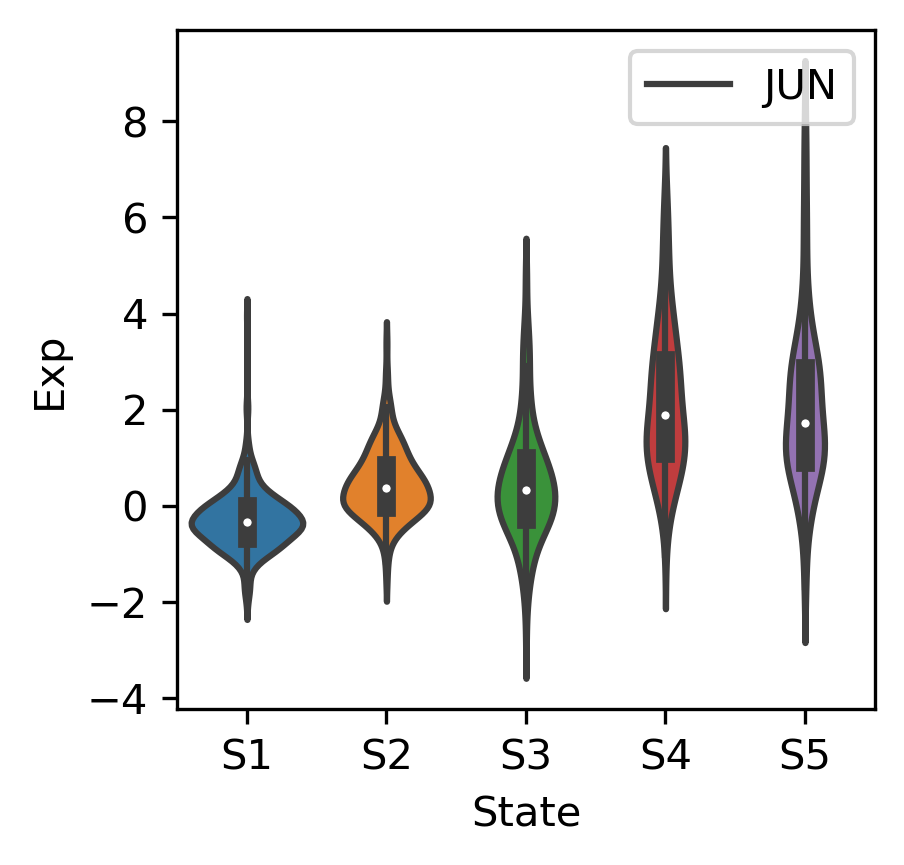

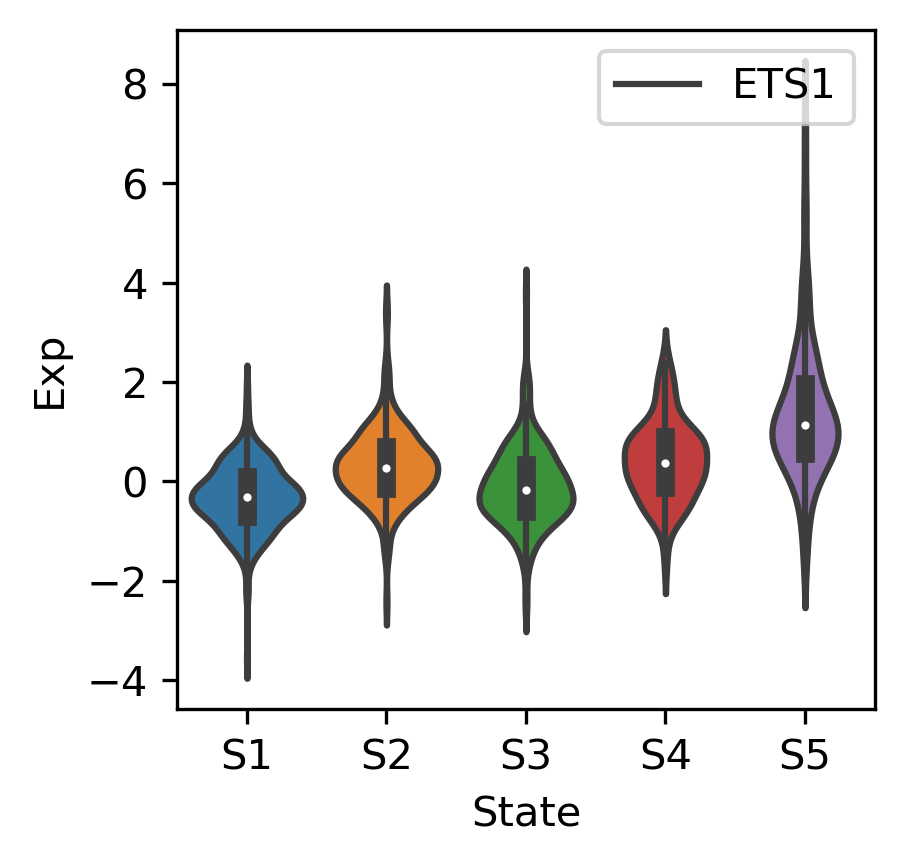

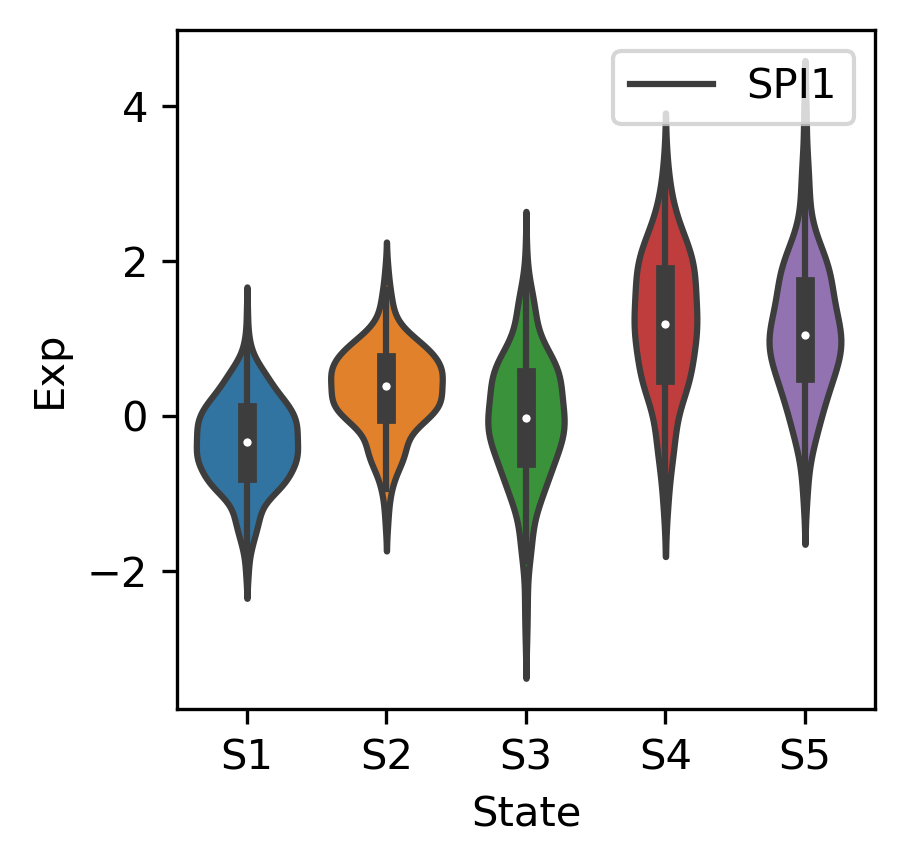

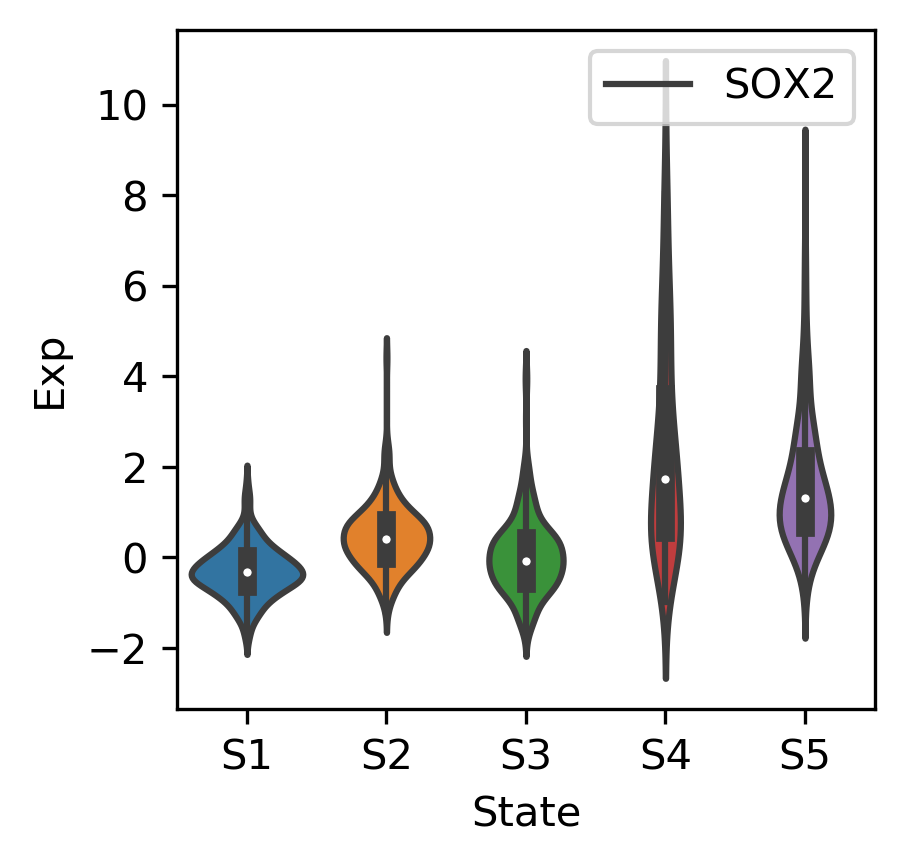

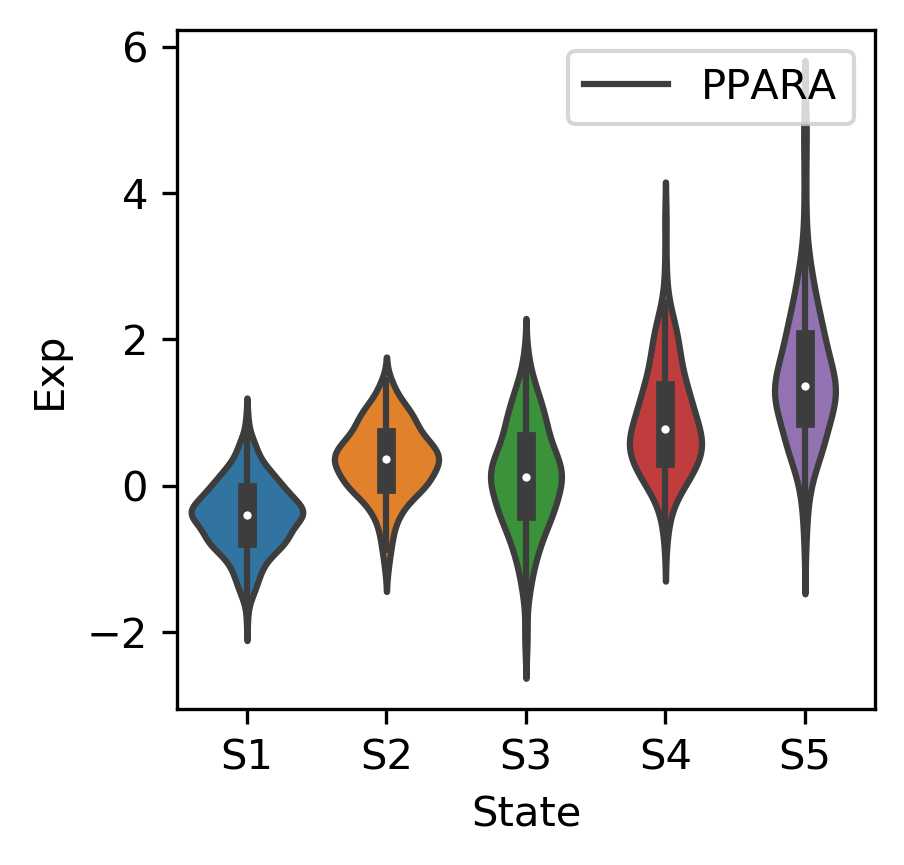

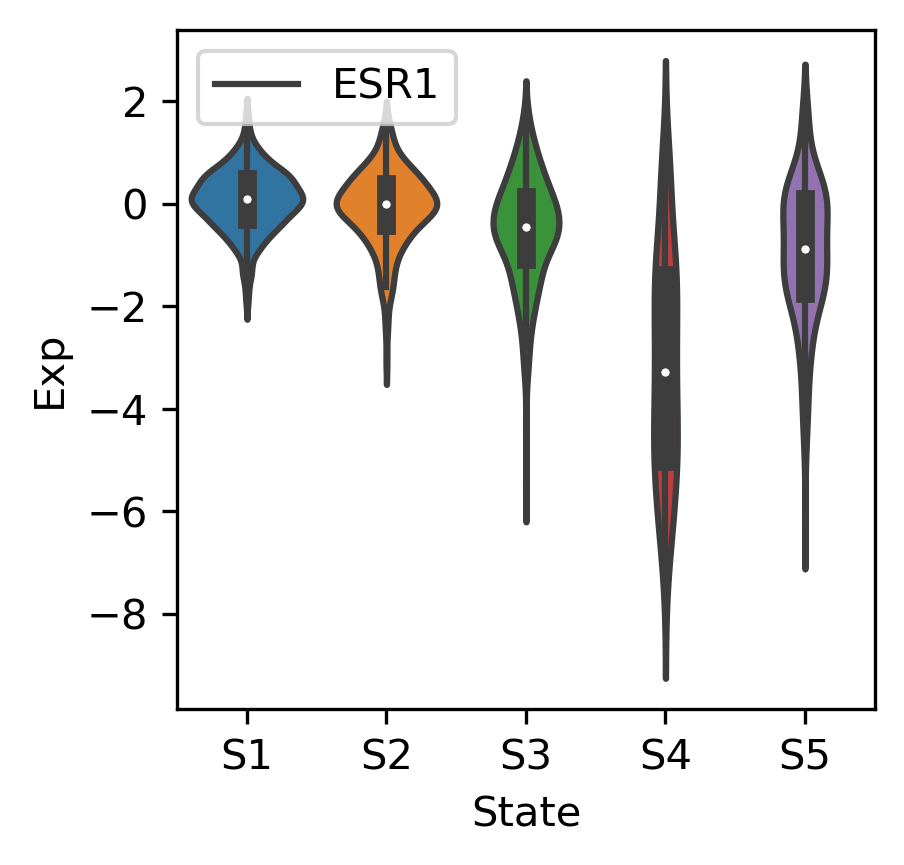

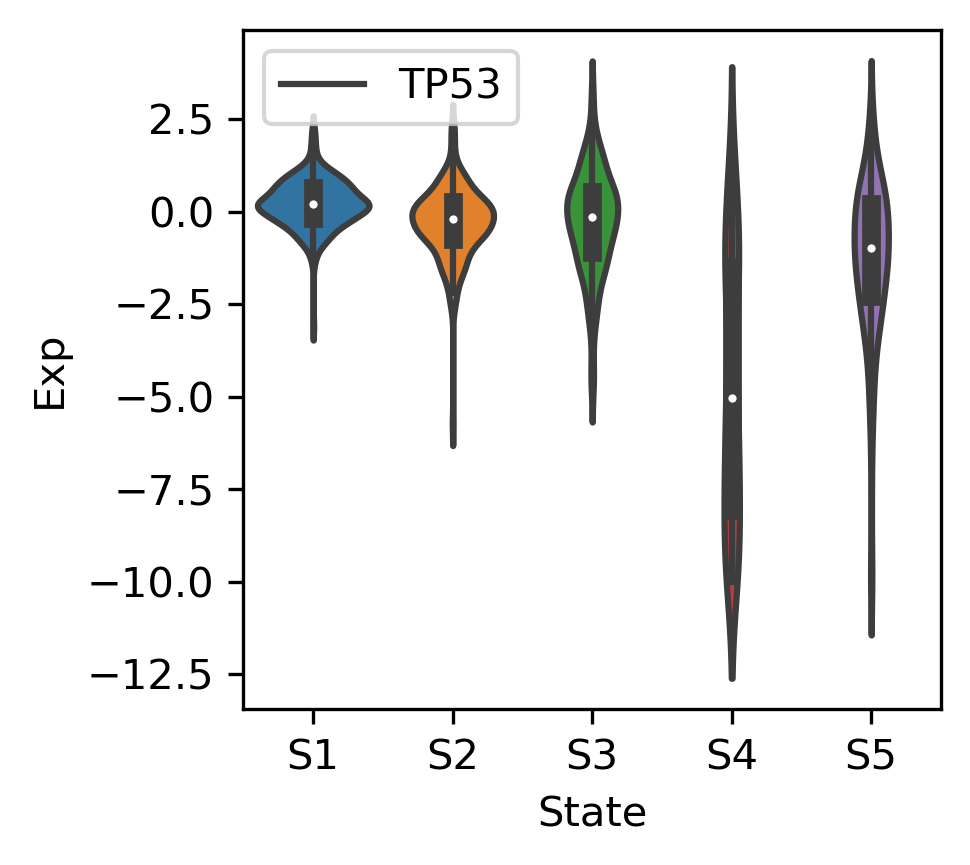

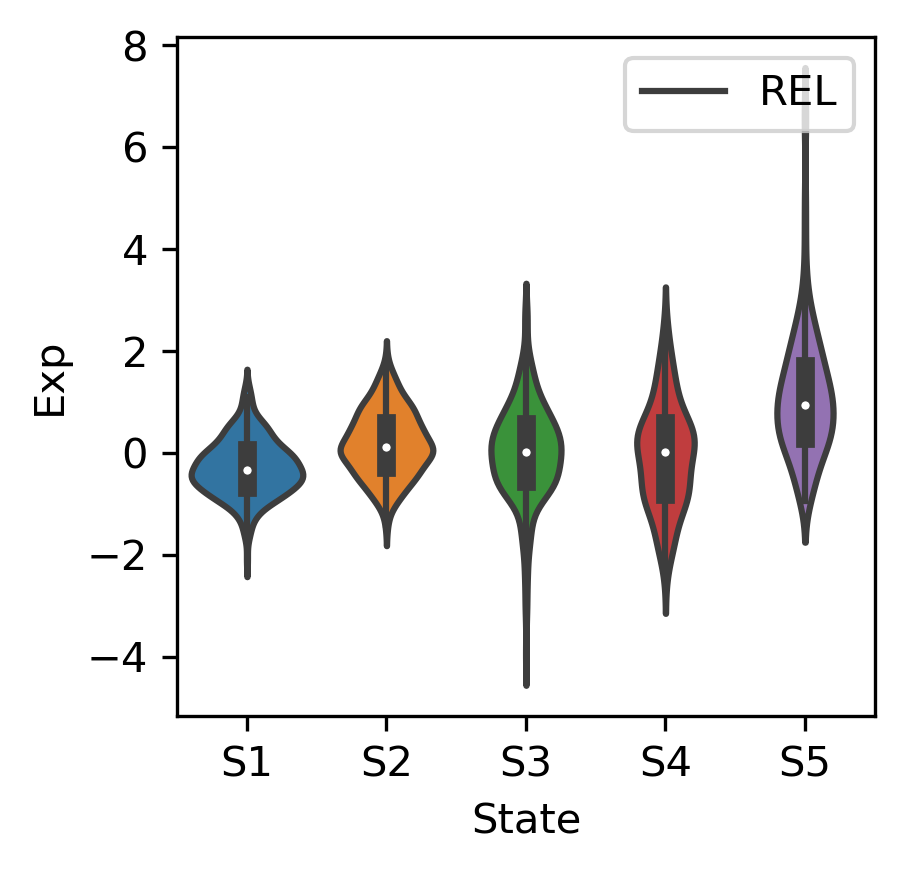

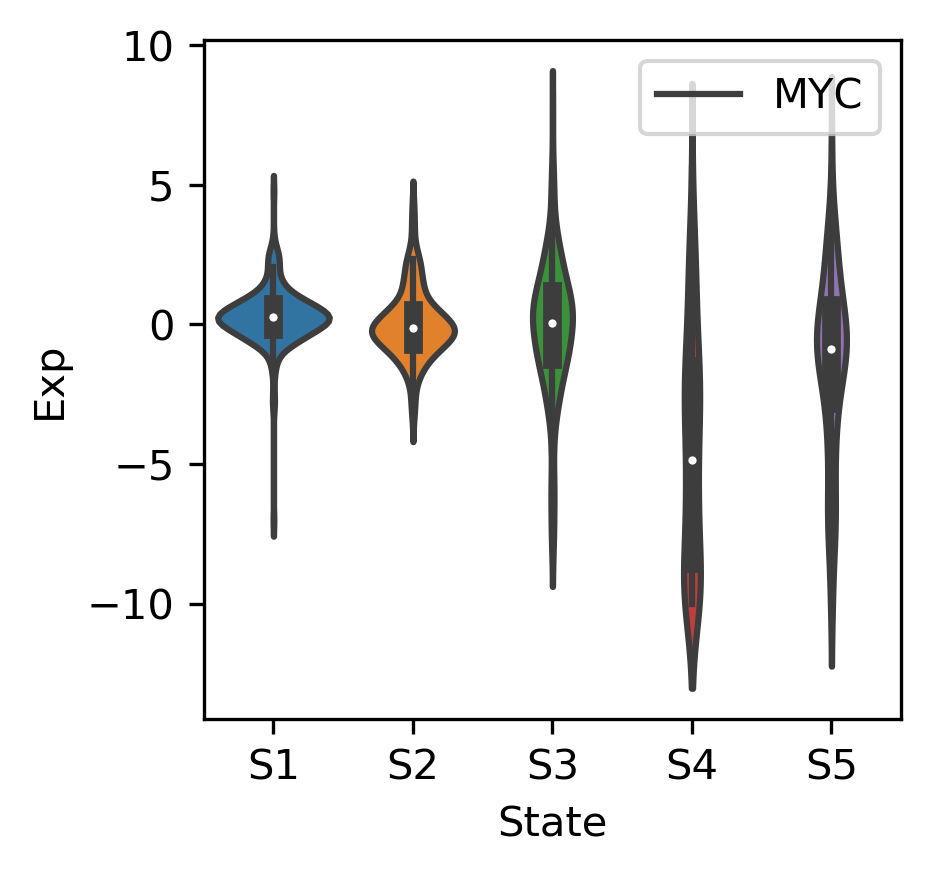

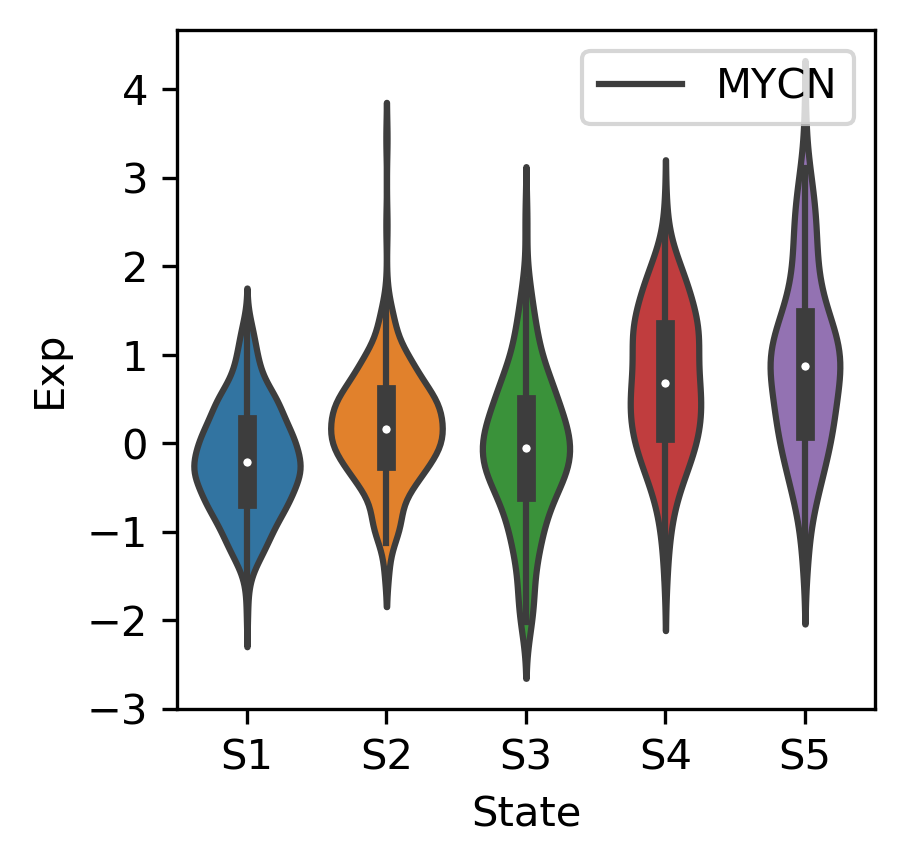

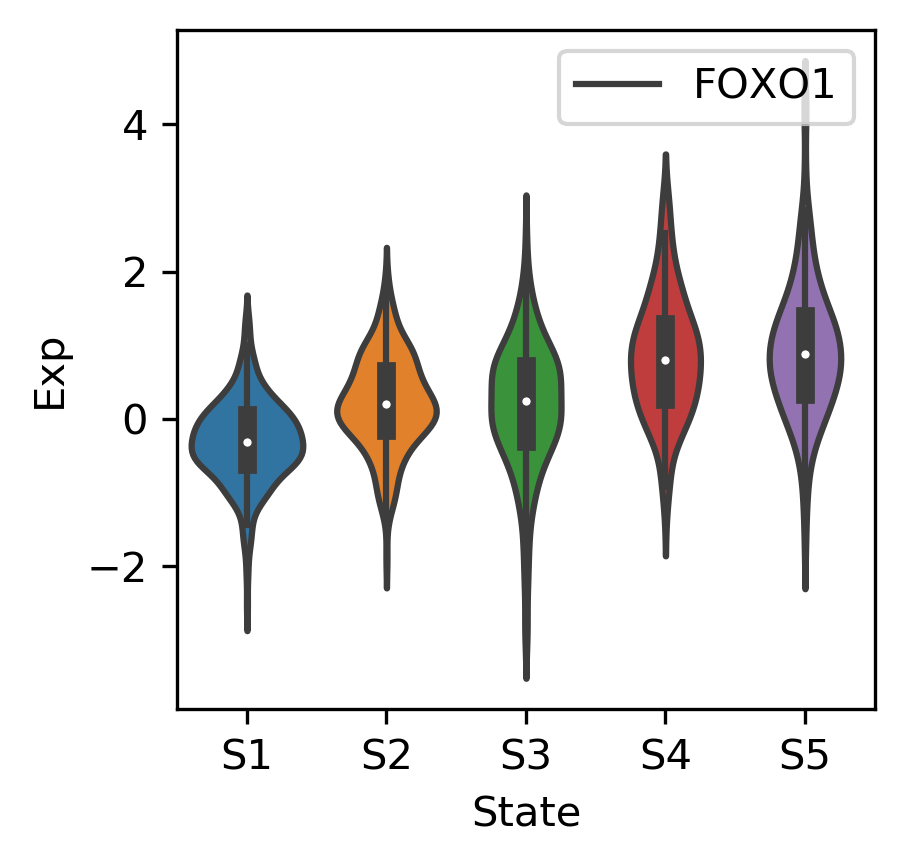

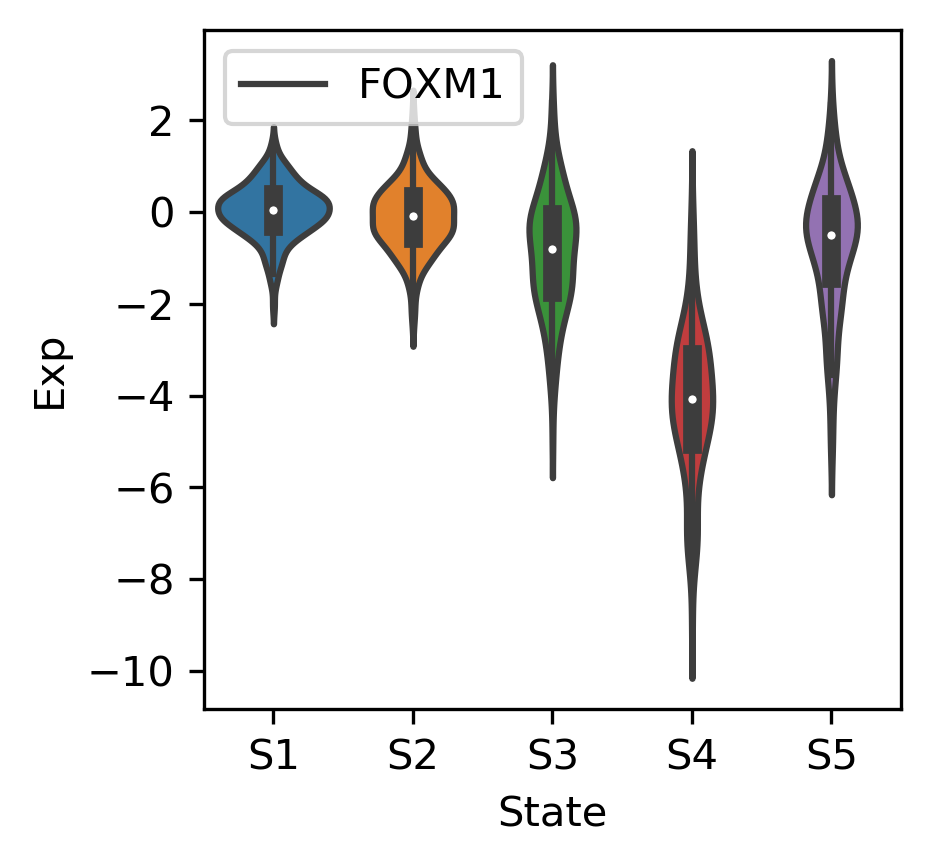

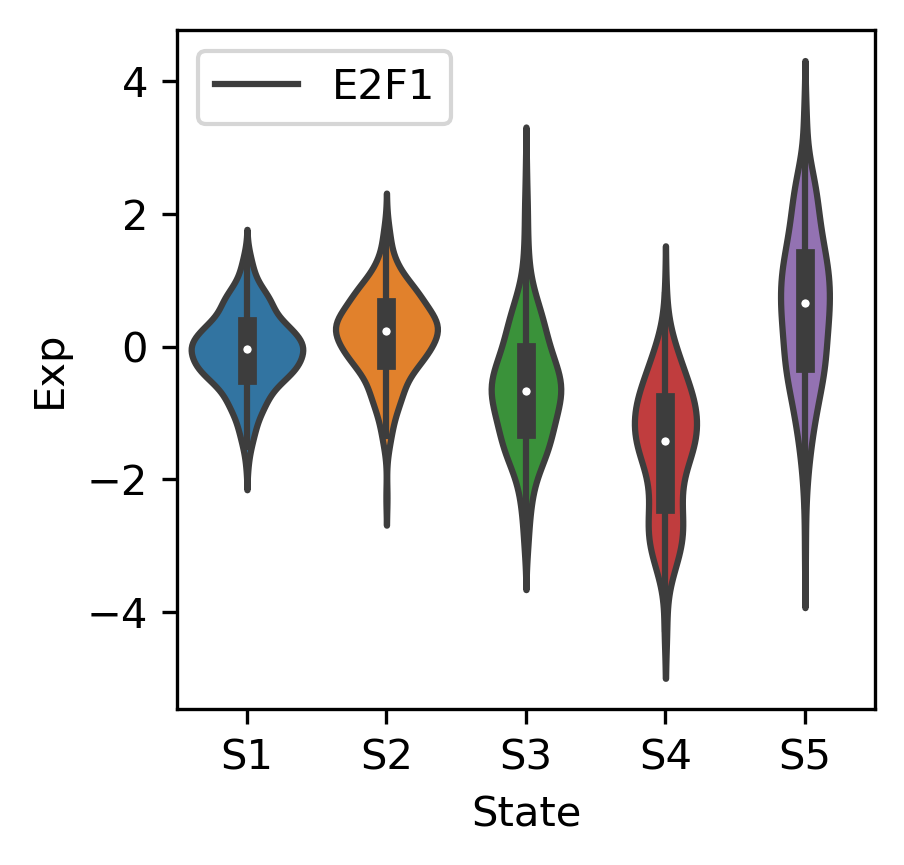

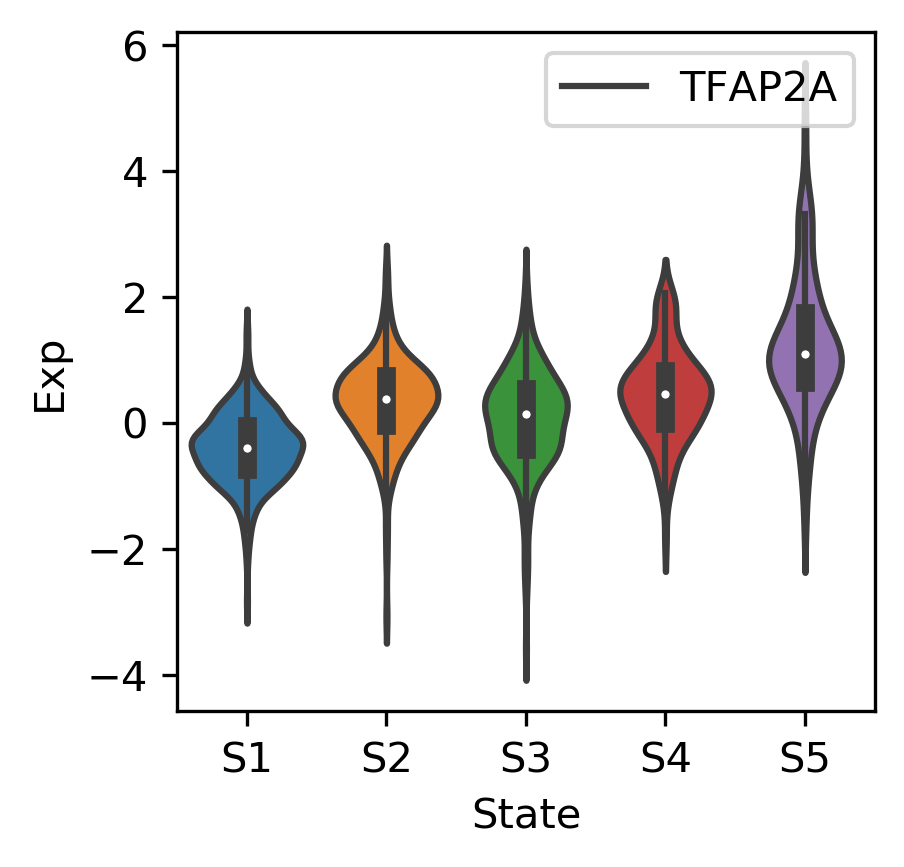

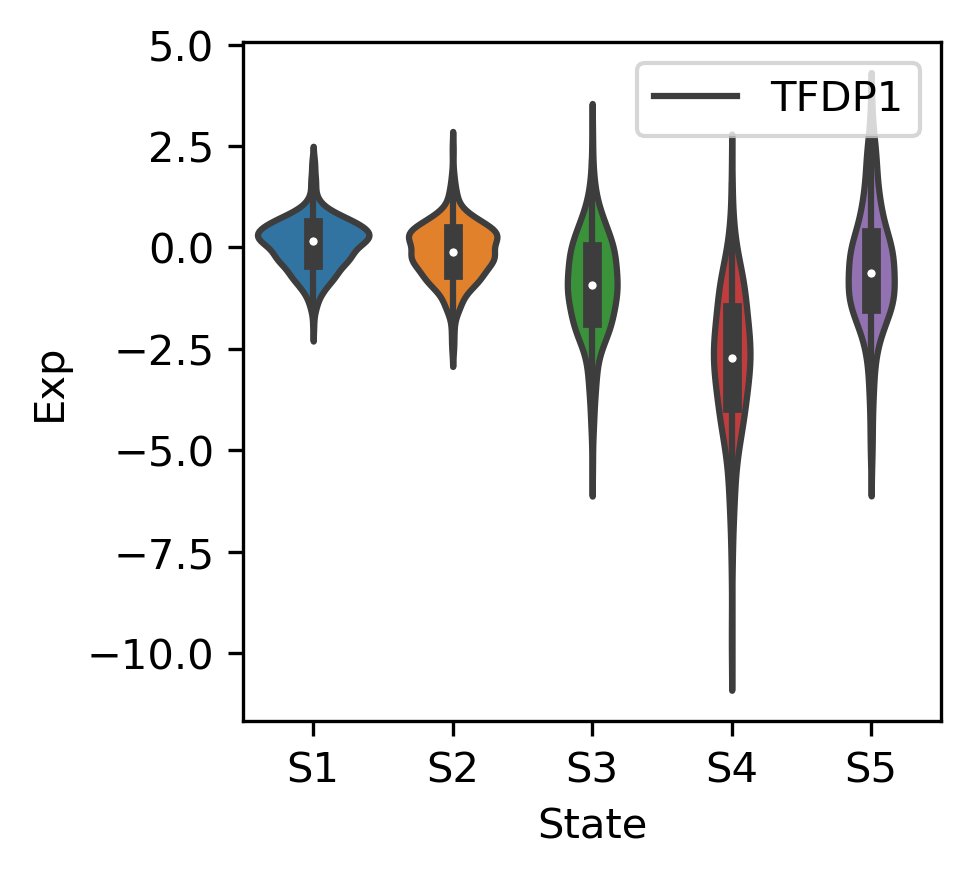

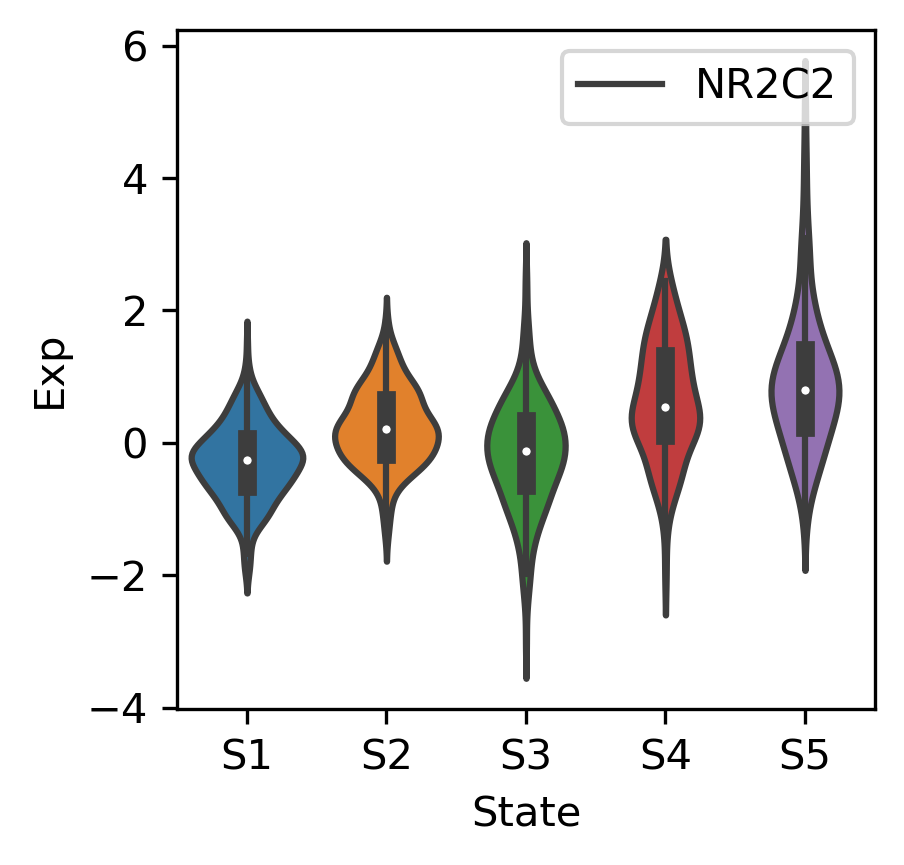

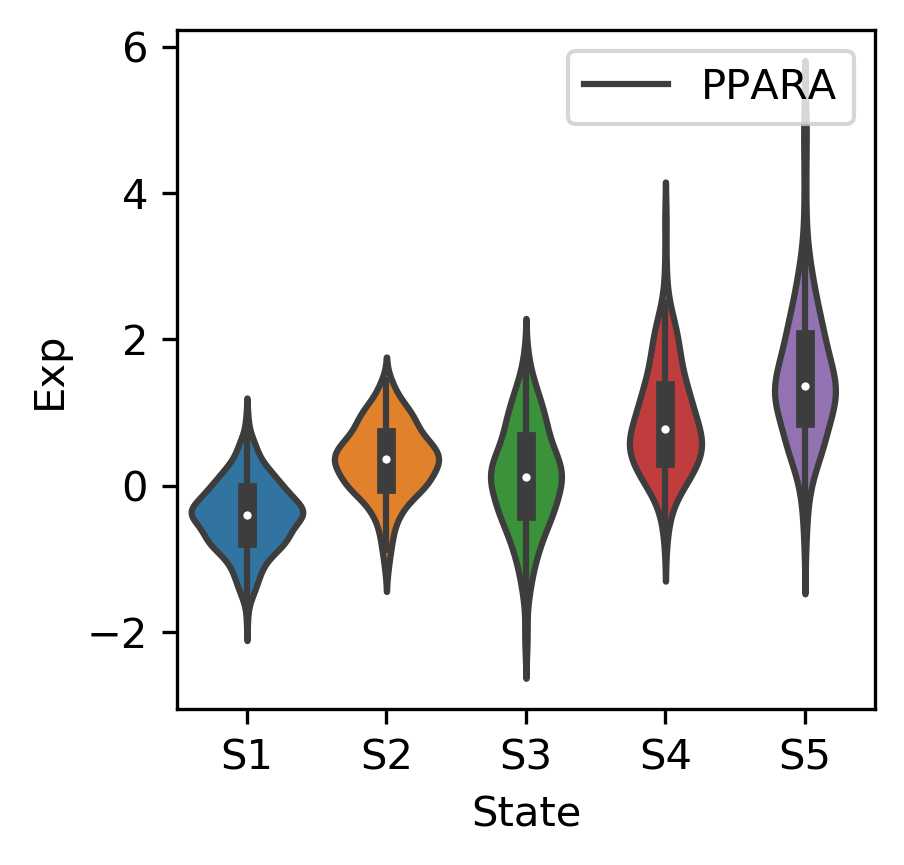

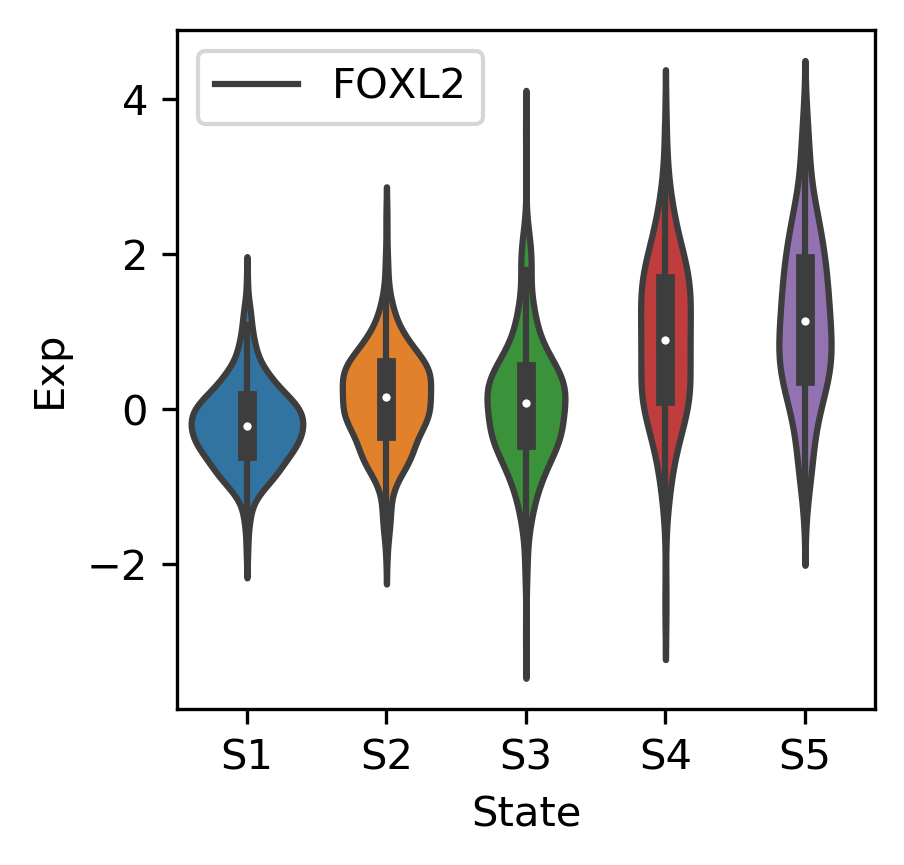

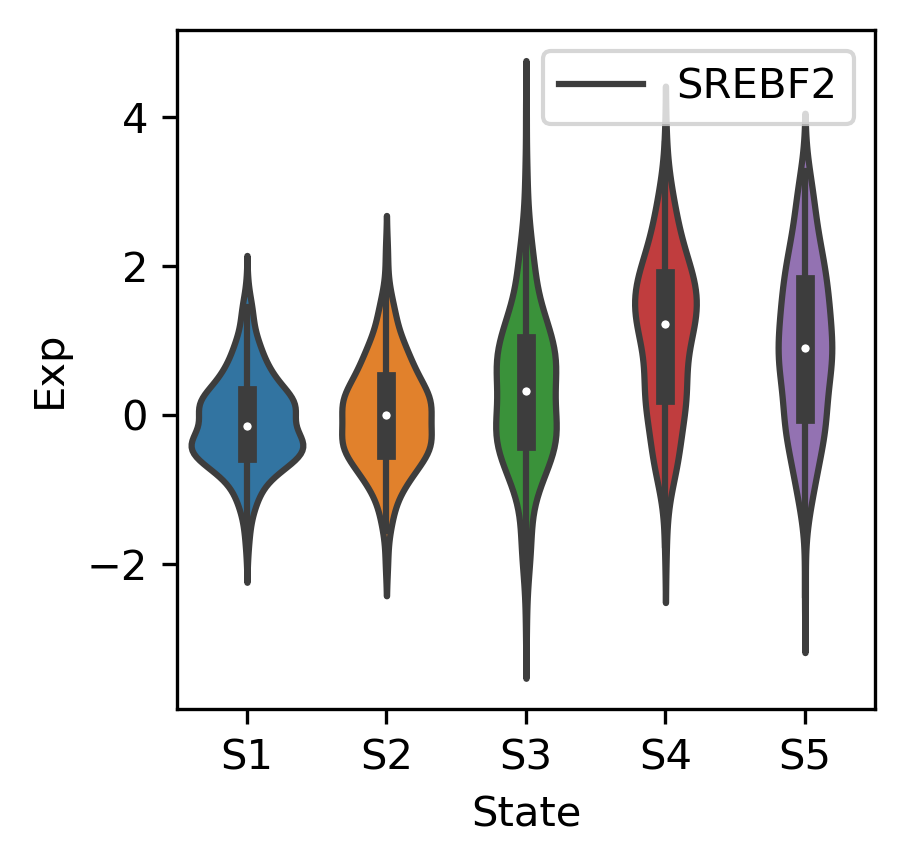

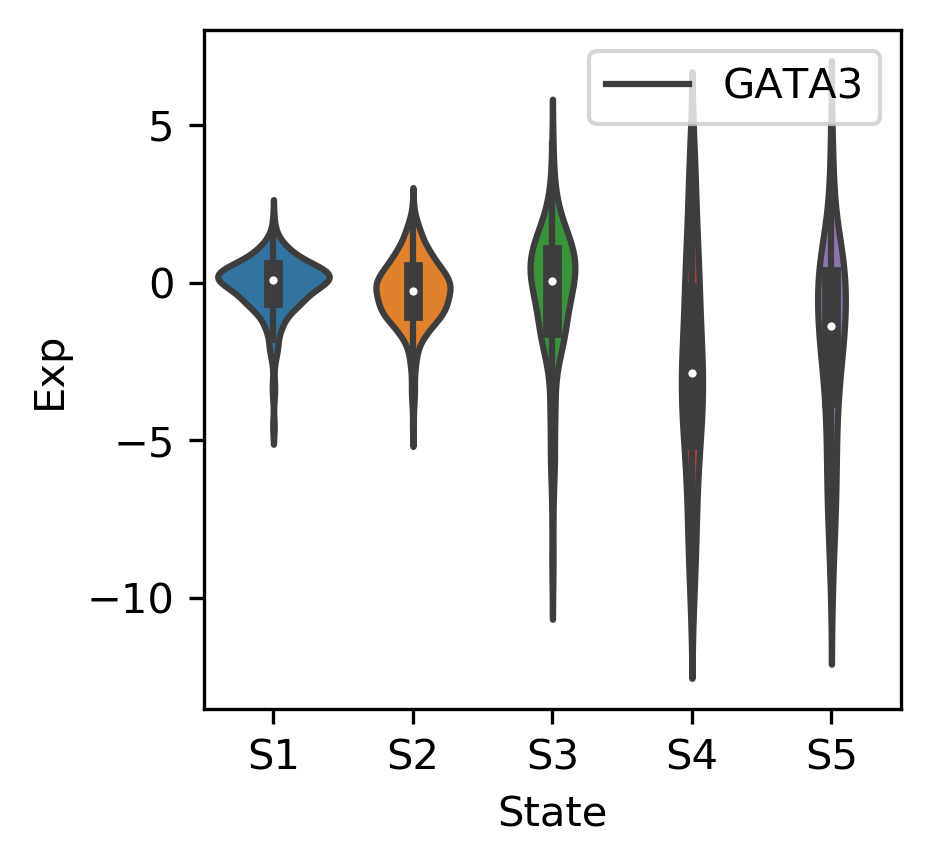

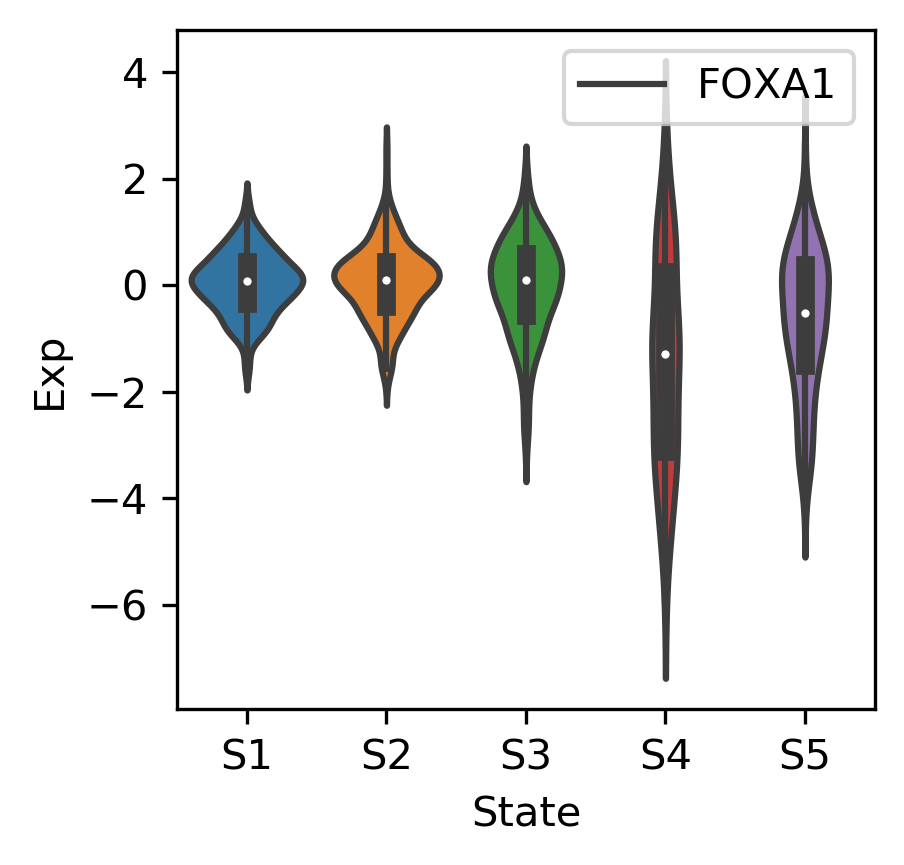

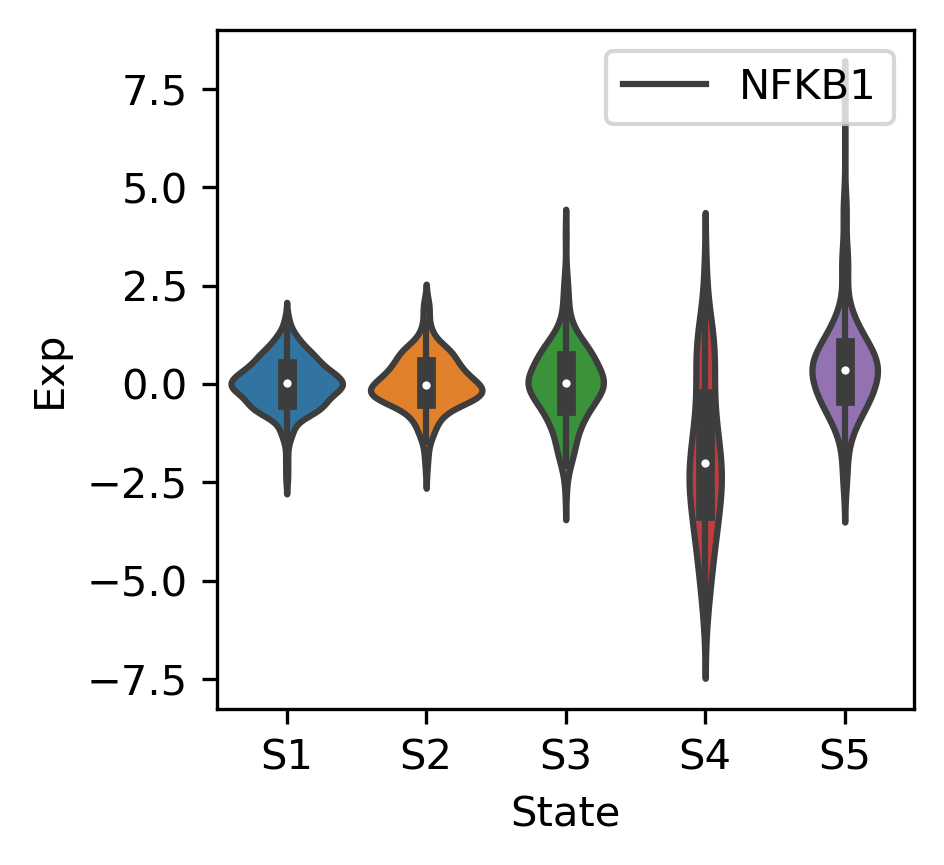

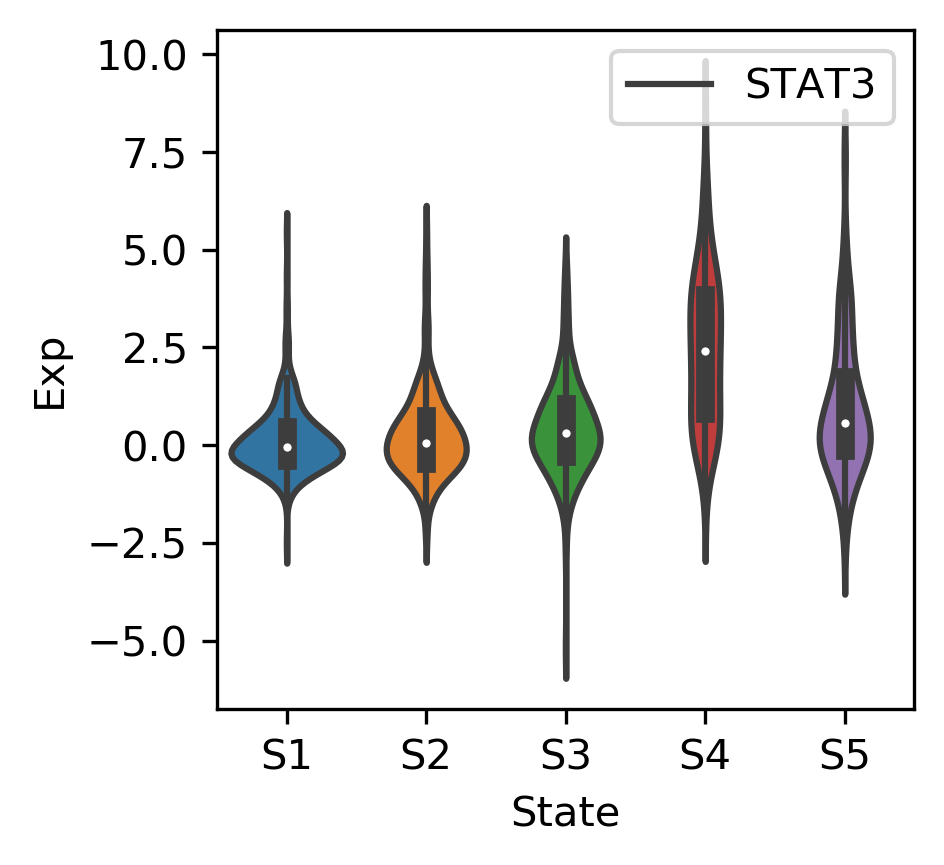

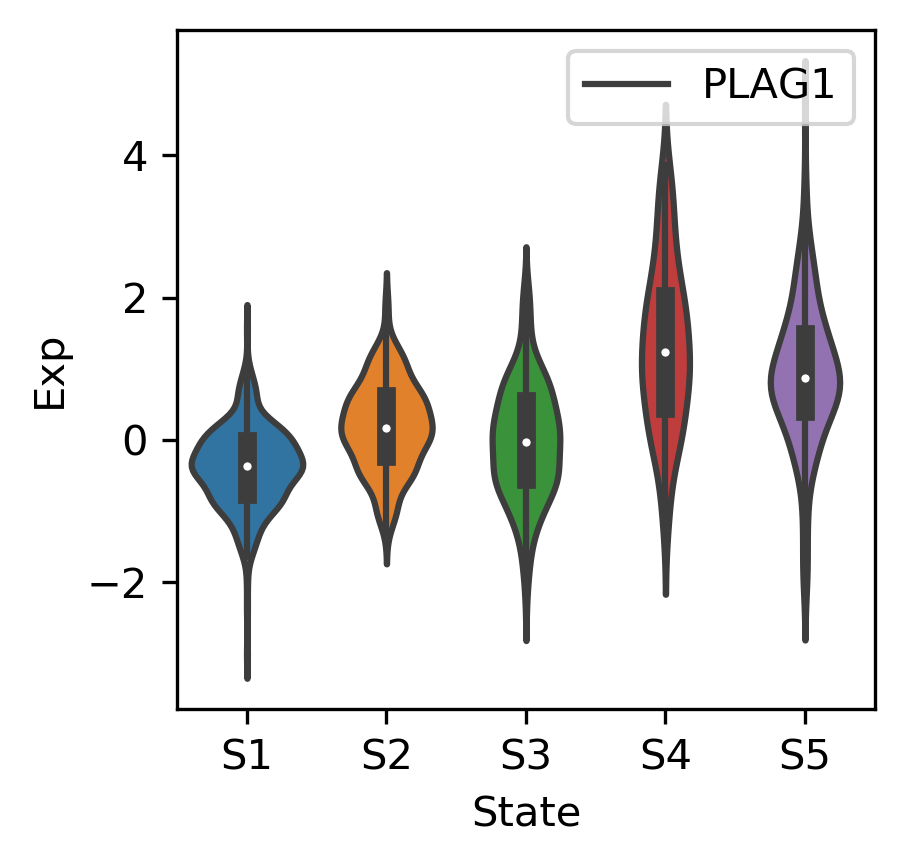

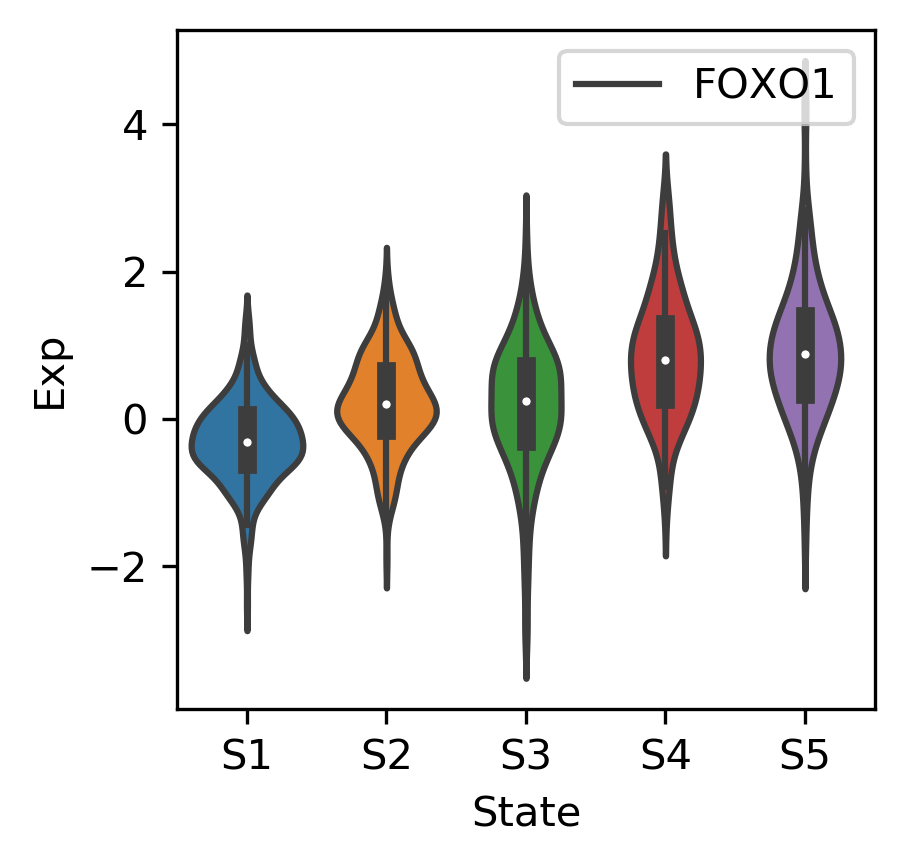

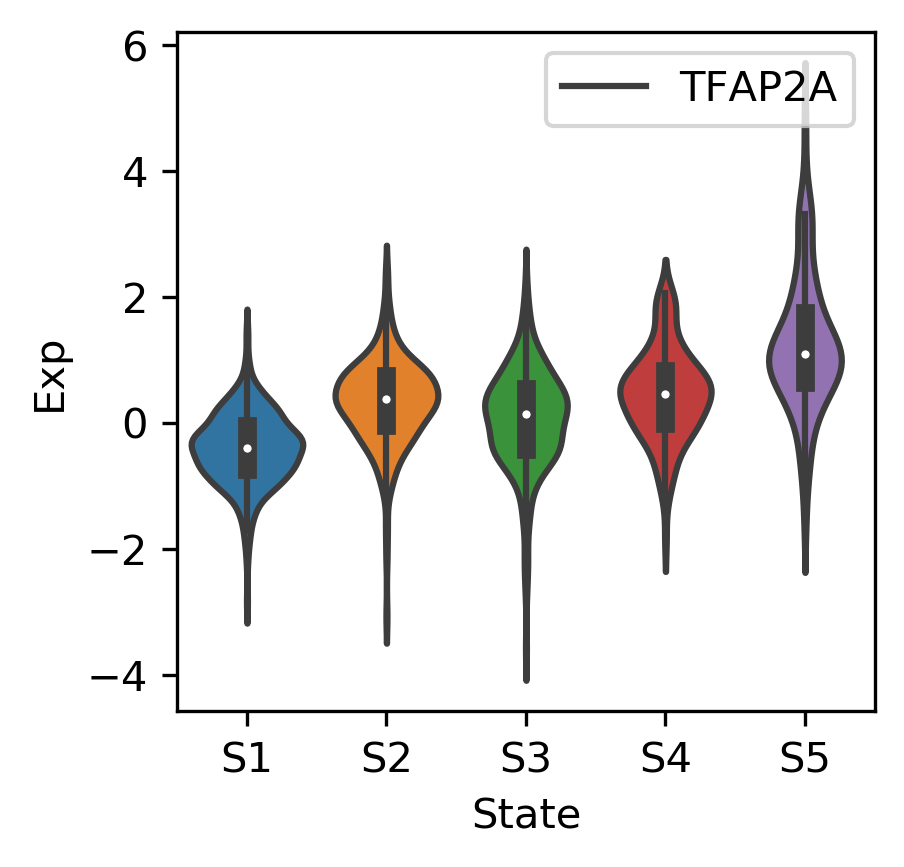

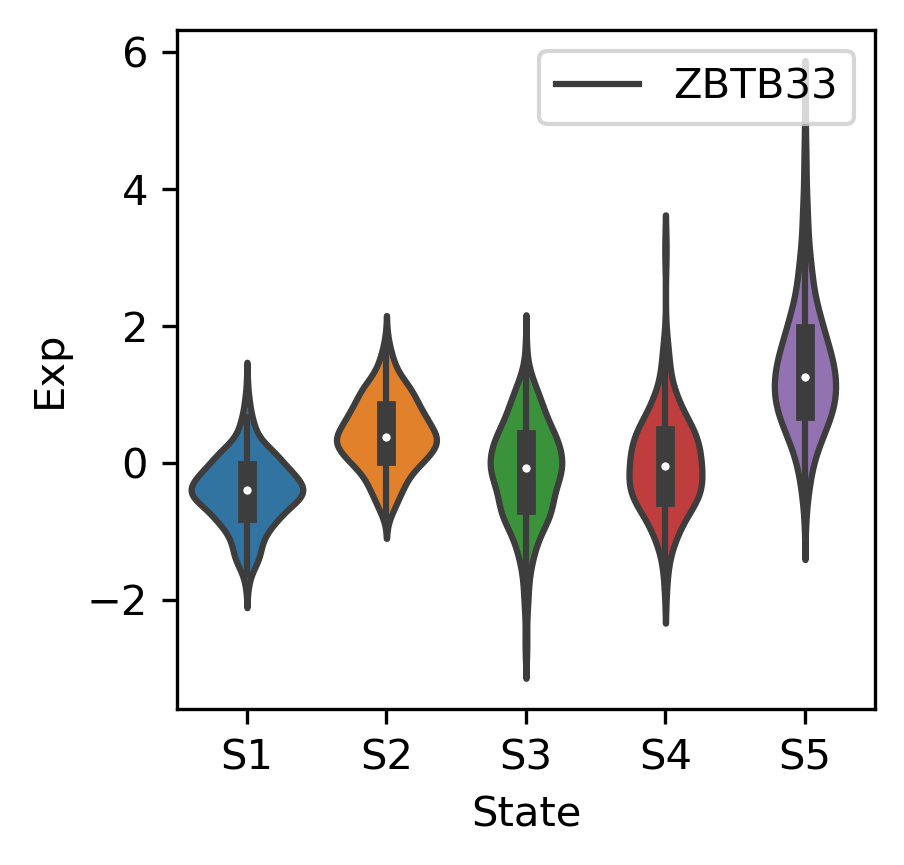

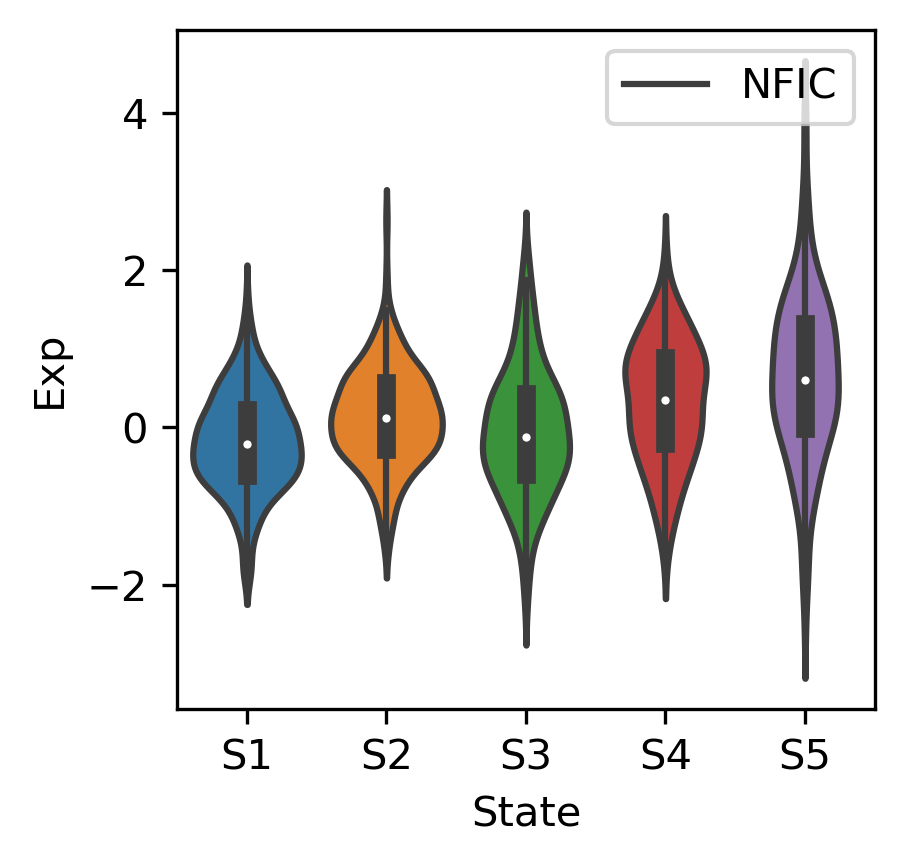

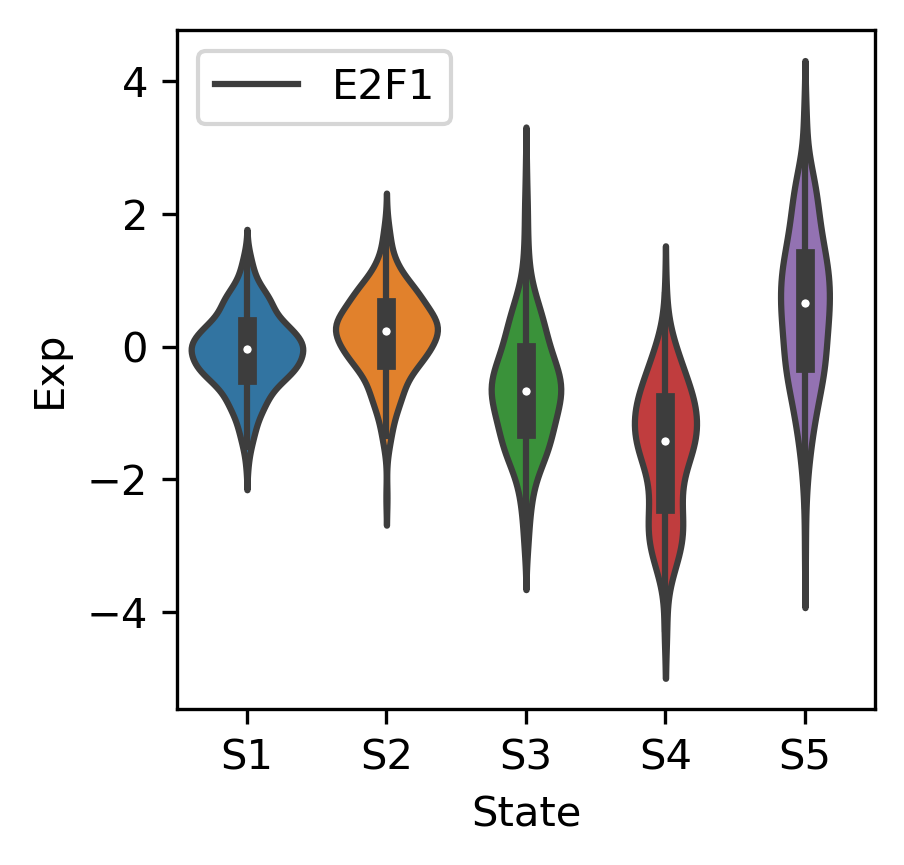

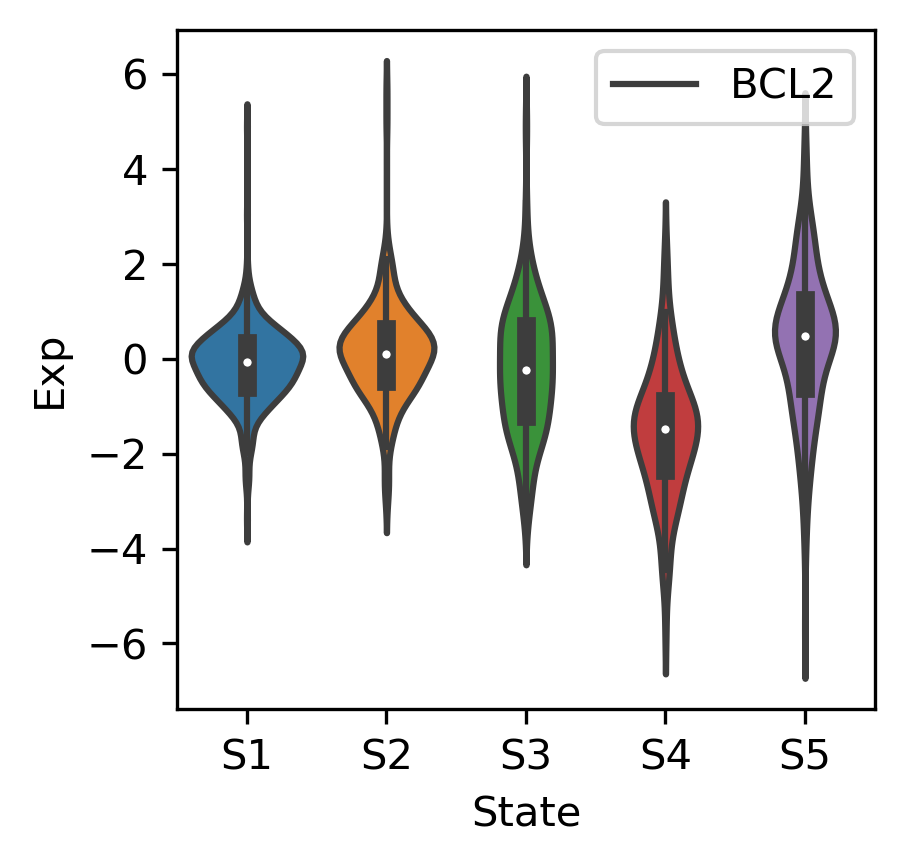

In [20]:
genelist = ['JUN','ETS1','SPI1','SOX2','PPARA','ESR1','TP53','REL','MYC','MYCN',
            'FOXO1','FOXM1','E2F1','TFAP2A','TFDP1','NR2C2','PPARA','FOXL2',
            'SREBF2','GATA3','FOXA1','NFKB1','STAT3','PLAG1','FOXO1', 'TFAP2A', 'ZBTB33', 'NFIC','E2F1','BCL2']
for gene in genelist:
    plot_gene_expr( data_matrix_MCF7_CTRP2, annotation_col_1, gene)


#### End of transcription factor annotation. For more annotation about drug concentration or drug targets, please check Example1_annotation_drugResponse.ipynb and Example1_annotation_targets.